In [1]:
import pandas as pd
from os import path, listdir
from pathlib import Path
import proc_model
import matplotlib.pyplot as plt
import math

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#1. Edge lengths

In [3]:
data_dir = path.join(path.dirname(proc_model.__file__), 'outputs')
home = str(Path.home())
output_dir = path.join(home, 'Documents', 'bachelor', 'article', 'pm_results')
input_files = listdir(data_dir)
SAVE = True

In [5]:
# function to parse parameters' values from experiment name
def get_lmin(name):
    return int(name.split('_')[3])
   
def get_lmax(name):
    return int(name.split('_')[4])

In [6]:
#read dataframe
filename = [f for f in input_files if 'length' in f][0]
df = pd.read_csv(path.join(data_dir, filename))
df['lMin'] = df['city'].apply(get_lmin)
df['lMax'] = df['city'].apply(get_lmax)
df['lmean'] = (df.lMax + df.lMin)/2
df['lstd'] = (df.lMax - df.lMin)/math.sqrt(12)



###1.1 Mean of distribution and generated edges

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


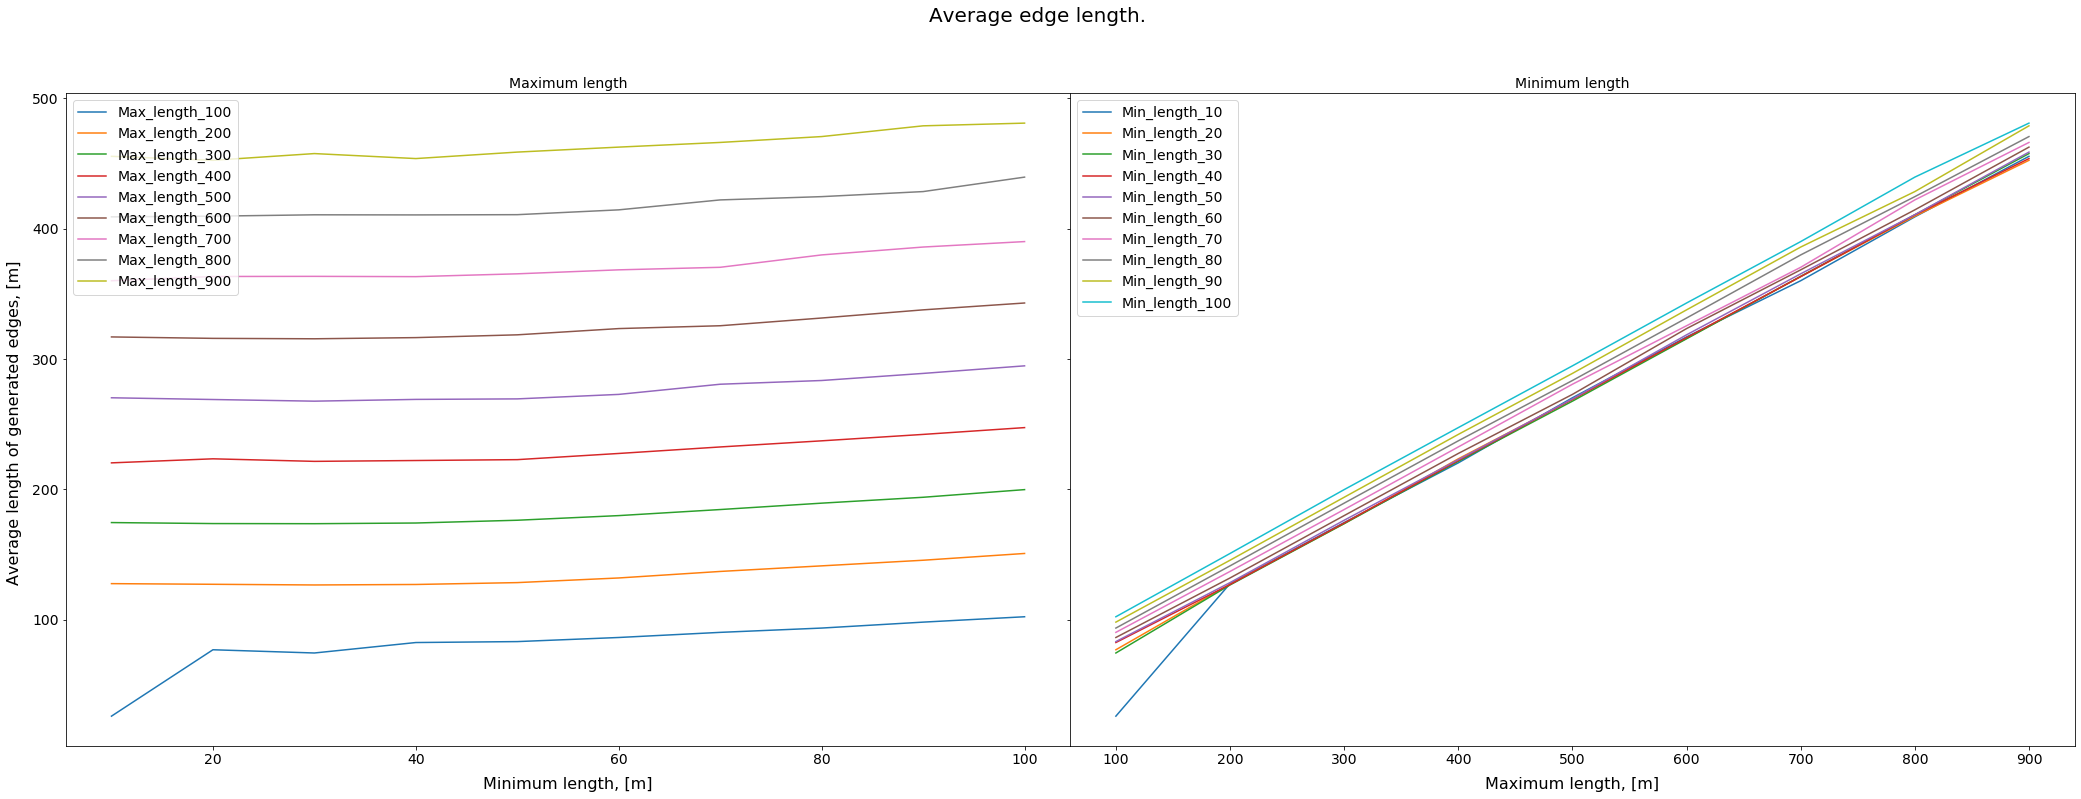

In [7]:
values = [i for i in sorted(set(df.lMax))]


fig, axes = plt.subplots(ncols=2,  sharey=True, figsize=(36, 12))
plt.suptitle('Average edge length.')

ax = axes[0]
for val in values:
    df_ = df[df.lMax == val]
    df_.plot(kind='line', x='lMin', y='edge_length_avg', label='Max_length_%s' % val, ax=ax)
    # means.append(df_.edge_length_avg.mean()) 
ax.set_xlabel('Minimum length, [m]', labelpad=10)
ax.set_ylabel('Average length of generated edges, [m] ', labelpad=10)
# ax.plot(values, means, label='mean of average lengths')
ax.legend(loc=2)
ax.set_title('Maximum length')

ax = axes[1]
values = [i for i in sorted(set(df.lMin))]

for val in values:
    df_ = df[df.lMin == val]
    df_.plot(kind='line', x='lMax', y='edge_length_avg', label='Min_length_%s' % val, ax=ax)
ax.set_xlabel('Maximum length, [m]', labelpad=10)
ax.set_ylabel('Average length of generated edges, [m] ', labelpad=10)
ax.legend(loc=2)
ax.set_title('Minimum length')
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'edge_lengths.eps'), bbox_inches='tight')


###1.2 Node and edge counts

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


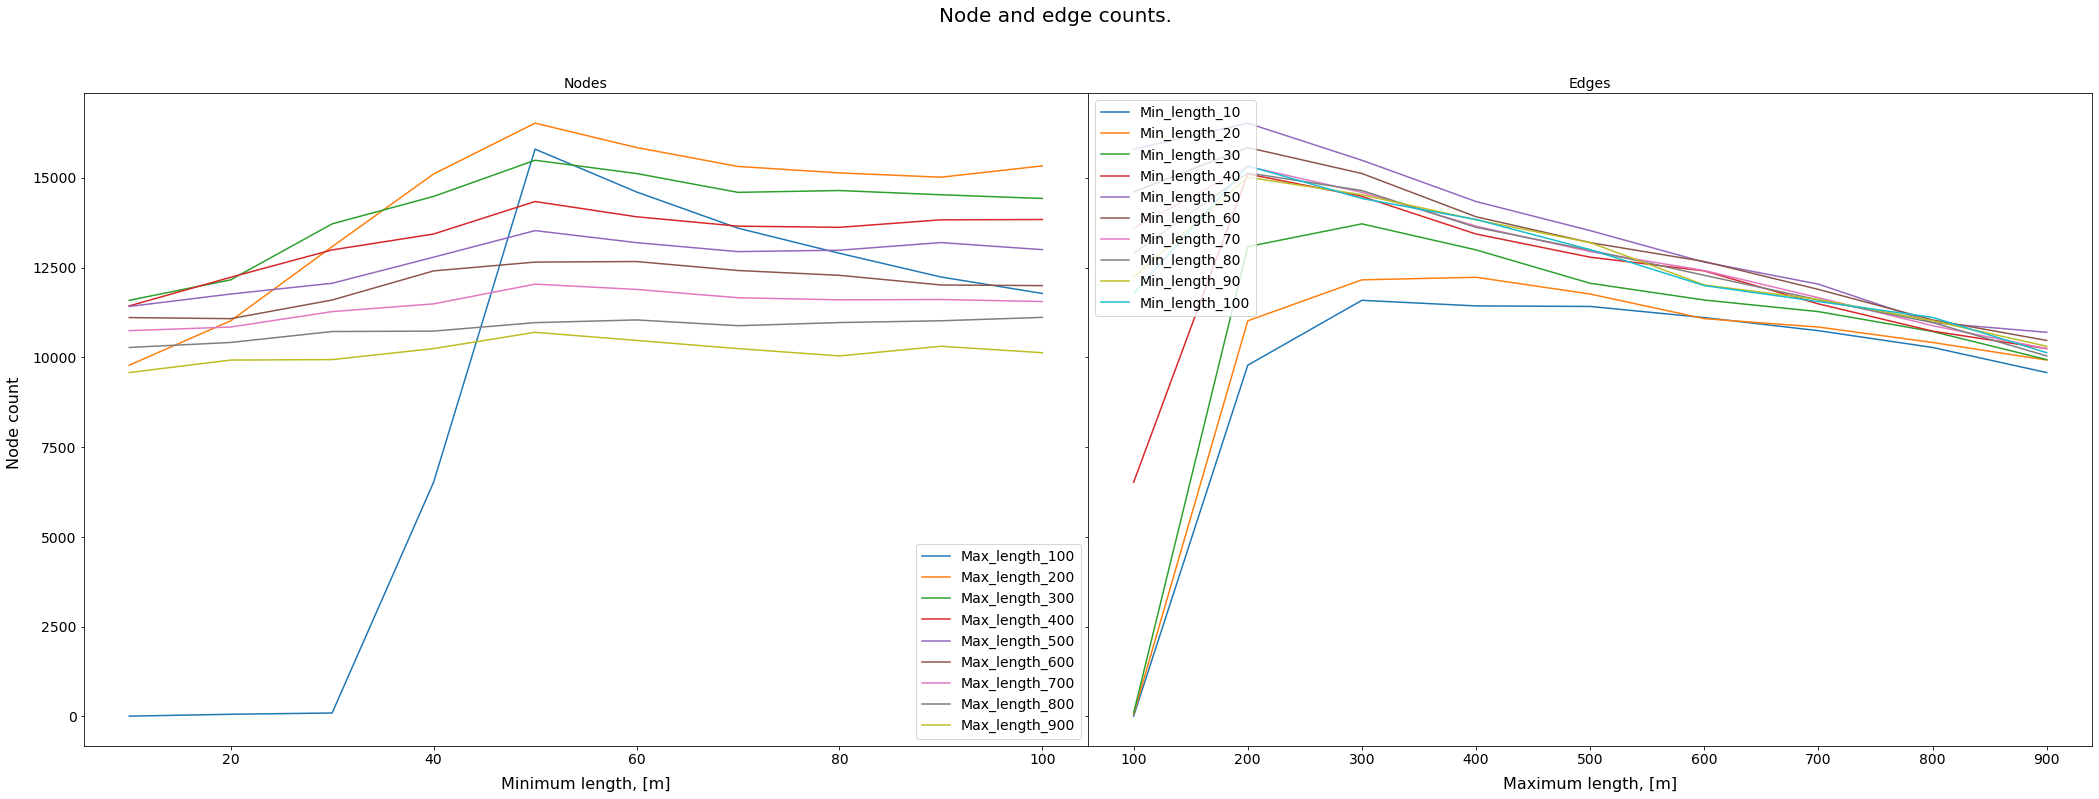

In [100]:
values = [i for i in sorted(set(df.lMax))]


fig, axes = plt.subplots(ncols=2,  sharey=True, figsize=(36, 12))
plt.suptitle('Node and edge counts.')

ax = axes[0]
for val in values:
    df_ = df[df.lMax == val]
    df_.plot(kind='line', x='lMin', y='num_nodes', label='Max_length_%s' % val, ax=ax)
ax.set_xlabel('Minimum length, [m]', labelpad=10)
ax.set_ylabel('Node count ', labelpad=10)

ax.legend(loc=4)
ax.set_title('Nodes')

ax = axes[1]
values = [i for i in sorted(set(df.lMin))]

for val in values:
    df_ = df[df.lMin == val]
    df_.plot(kind='line', x='lMax', y='num_nodes', label='Min_length_%s' % val, ax=ax)
ax.set_xlabel('Maximum length, [m]', labelpad=10)
ax.set_ylabel('Average length of generated edges, [m] ', labelpad=10)
ax.legend(loc=2)
ax.set_title('Edges')
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'lengths_counts.eps'), bbox_inches='tight')
